### Outline
- <a href = #link1>  1. Problem Statement </a>
- <a href = #link2>  2. Data Overview </a>
- <a href = #link3>  3. Exploratory Data Analysis (EDA) </a>
- <a href = #link4>  4. Data Preprocessing </a>
- <a href = #link5>  5. Principal Component Analysis (PCA)  </a>
- <a href = #link6>  6. K-means Clustering   </a>
- <a href = #link7>  7. Hierarchical Clustering </a>
- <a href = #link8>  8. K-means vs Hierarchical Clustering </a>
- <a href = #link9>  9. Insights and Recommendations </a>

# <a name='link1'>  1. Problem Statement</a>

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

### Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. The goal is to analyze the data provided by ReCell company (a startup aiming to tap the potential in this market) and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

# <a name='link2'>  2. Data Overview</a>

### Importing Nessesory Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

#Removes the limit from the number of displayed columns and rows.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

#Using plotly for specific plots of categorical variables
import plotly.graph_objects as go
import plotly.express as px
from  plotly.subplots import make_subplots
import plotly.io as pio

#Add a nice bachground to graphs and show graghs in the notebood
sns.set(color_codes=True)
%matplotlib inline 

#To build linear regression_model using sklearn
from sklearn.linear_model import LinearRegression
#Function to randomly split the data into train data and test data
from sklearn.model_selection import train_test_split  

#To build linear regression_model using statsmodels
import statsmodels.api as sm

#To check the regression model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
#importing DataFrame with the name "used_phone_data.csv"
data=pd.read_csv('used_phone_data.csv')
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [3]:
print(f'There are {data.shape[1]} columns and {data.shape[0]} rows in the data set.')  # f-string

There are 15 columns and 3571 rows in the data set.


### Data Dictionary

The provided dataset contains the following columns:

1. `brand_name`: Name of manufacturing brand
2. `os`: OS on which the phone runs
3. `screen_size`: Size of the screen in cm
4. `4g`: Whether 4G is available or not
5. `5g`: Whether 5G is available or not
6. `main_camera_mp`: Resolution of the rear camera in megapixels
7. `selfie_camera_mp`: Resolution of the front camera in megapixels
8. `int_memory`: Amount of internal memory (ROM) in GB
9. `ram`: Amount of RAM in GB
10. `battery`: Energy capacity of the phone battery in mAh
11. `weight`: Weight of the phone in grams
12. `release_year`: Year when the phone model was released
13. `days_used`: Number of days the used/refurbished phone has been used
14. `new_price`: Price of a new phone of the same model in euros
15. `used_price`: Price of the used/refurbished phone in euros

Let us take a look at the imported data and the summary of different columns:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


Four of the columns represent <font color='green'>categorical variables (qualitative)</font>, i.e.:

* brand_name
* os
* 4g
* 5g
And 11 other columns represent <font color='green'>quantitative variables</font>:

* screen_size
* main_camera_mp
* selfie_camera_mp
* int_memory
* ram
* battery
* weight
* release_year
* days_used
* new_price
* used_price

Now we check the missing values in the data. Below, number of missing values in any column of the imported data are shown:

In [5]:
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

# <a name='link3'>  3. Exploratory Data Analysis (EDA)</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help us approach the analysis in the right manner and generate insights from the data.

#### What does the distribution of used phone prices look like?

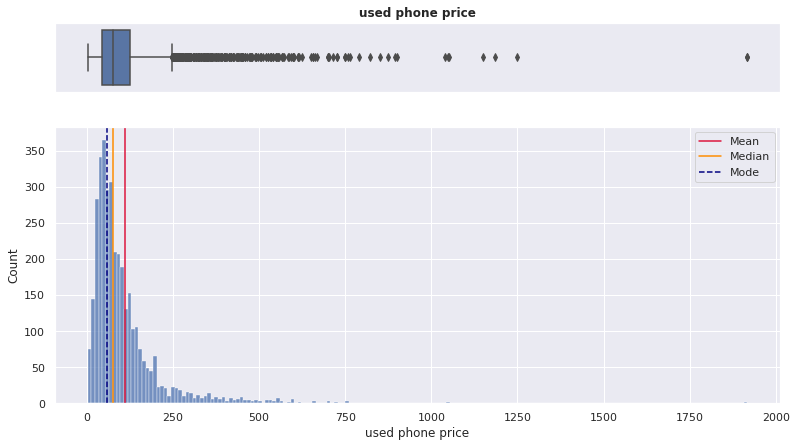

In [6]:
feature = "used_price"

fig, ax = plt.subplots(2, 1, figsize=(13,7),gridspec_kw={"height_ratios": [1,4]})

# we flatten the ax to iterate over subplots easily
ax = ax.flatten()

#Drawing boxplot
sns.boxplot(data=data, x=feature,orient="h",ax=ax[0]);
ax[0].set_title(label= 'used phone price', weight="bold"); # adding title to each figure
ax[0].xaxis.set_visible(False)

#Drawing histogram and specifying mean, median, and mode
sns.histplot(data=data, x=feature,ax=ax[1]);
ax[1].axvline(data[feature].mean(), color="crimson", label="Mean"); # adding mean vertical line
ax[1].axvline(data[feature].median(), color="darkorange", label="Median"); # adding median vertical line
ax[1].axvline(data[feature].mode()[0], ls="--" , color="navy", label="Mode"); # adding mode vertical line
ax[1].set(xlabel='used phone price', ylabel='Count');

ax[1].legend();

* The distribution of used phone prices is right skewed.
* Mean and median of prices are  110and 75.5, respectively.
* Prices range from  2.5to 1916.
* This is while most of cell phone prices are less than $126. Hence, there might be outliesr in the used price data.

Summery of all numerical features are show below:

In [7]:
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,237.389037,109.880277
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,197.545581,121.501226
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


#### What percentage of the used phone market is dominated by Android devices?

90.9 percent of used phone market is dominated by Android devices


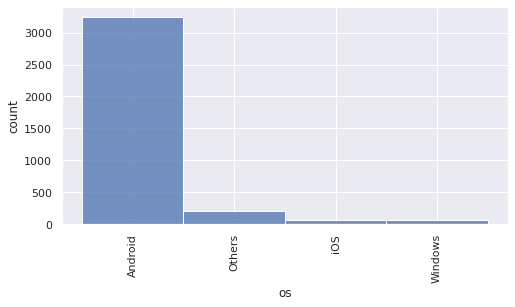

In [8]:
print('{} percent of used phone market is dominated by Android devices'.format(round(data['os'].value_counts(dropna=False)[0]/data['os'].value_counts(dropna=False).sum() *100 ,2))  )

fig = plt.figure(figsize=(8, 4));


ax=sns.histplot(x='os', data=data );

#adding labels
ax.set(xlabel='os', ylabel='count');
ax.tick_params(axis='x', rotation=90);

#### The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

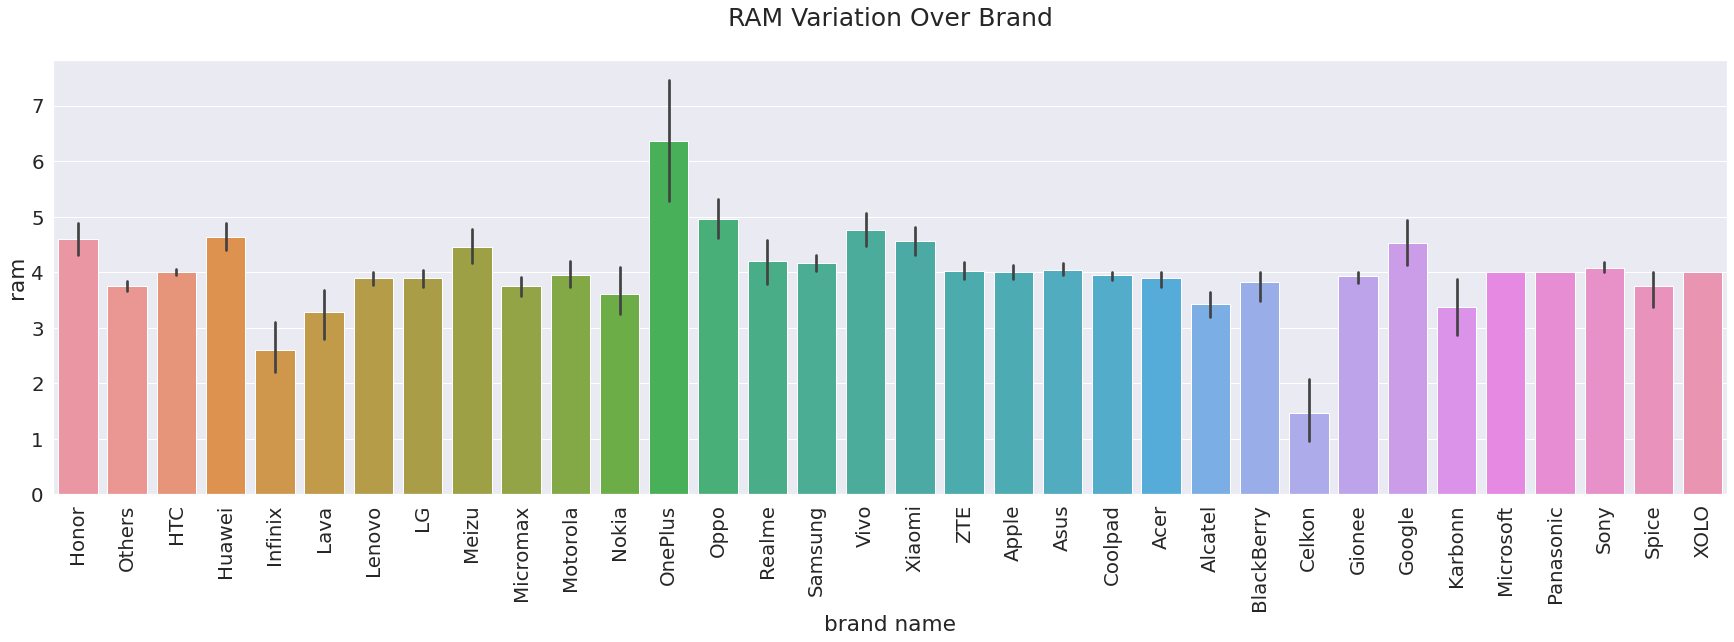

In [9]:
plt.figure(figsize=(30, 8));

#definig the color and font scale
color=sns. set_palette("husl")
sns.set(font_scale = 1.8)


#plotting
fig=sns.barplot(x='brand_name', y='ram', data=data, palette=color)  # barplot

#adding title and labels
plt.title('RAM Variation Over Brand\n', fontsize=25)
fig.set(xlabel='brand name', ylabel='ram');
plt.xticks(rotation=90);

* We see most variation in amount of ram of OnePlus phones.
* On the countrary, the variations are very small for some brands such as HTC, Lenovo,Samsung, Coolpad, etc.

#### A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

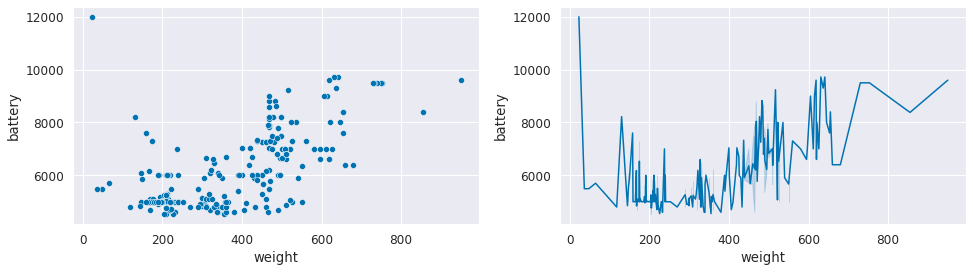

In [10]:
fig = plt.figure(figsize=(16, 4));
sns.set(font_scale = 1.1)

#definig the color
color=sns. set_palette("colorblind")

#plotting

# Adds subplot on position 1
fig.add_subplot(121)
sns.scatterplot(data= data[data['battery']> 4500] ,  x='weight',  y='battery');

# Adds subplot on position 2
fig.add_subplot(122)
sns.lineplot(data= data[data['battery']> 4500] ,  x='weight',  y='battery');

Phone's weight and battery size seem to have positive correlations. Overally, weight of the phone increases as the battery size increase. Histogram of phone weight for large battery sizes are as below:

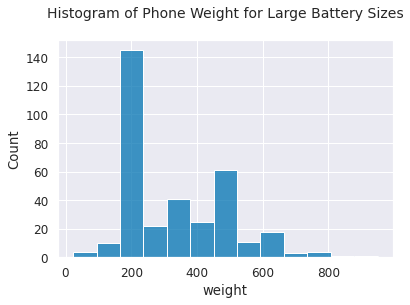

In [11]:
#plotting
plt.title('Histogram of Phone Weight for Large Battery Sizes\n', fontsize=14)

sns.histplot(data= data[data['battery']> 4500] , x='weight' );

#### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?

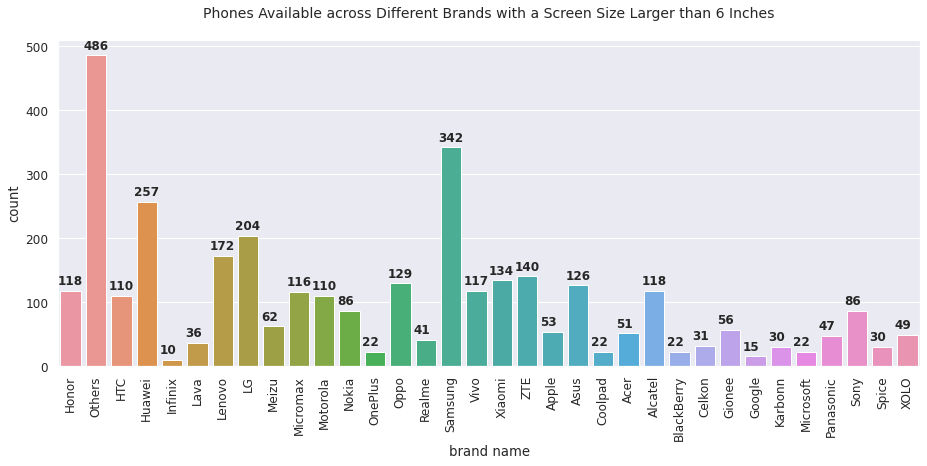

In [12]:
fig = plt.figure(figsize=(34, 6));

# Adds subplot on position 1
fig.add_subplot(121)

# plot the barchart
plt.title('Phones Available across Different Brands with a Screen Size Larger than 6 Inches\n', fontsize=14)

ax=sns.countplot(x='brand_name', data=data[data['screen_size']> 6] )

# display counts on each bar
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() -0.1, p.get_height()+10) , fontsize=12, weight='bold')

#adding labels
ax.set(xlabel='brand name', ylabel='count');
ax.tick_params(axis='x', rotation=90);

Let us sort the above plot based on the counts.

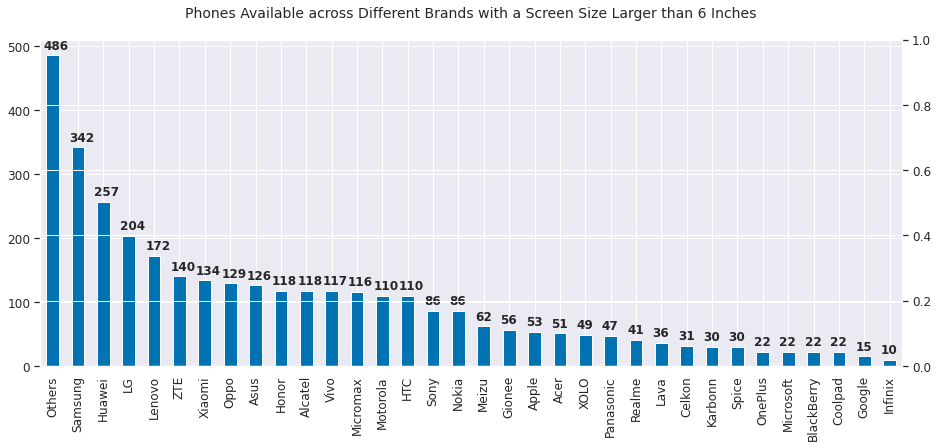

In [13]:
fig = plt.figure(figsize=(34, 6));

# Adds subplot on position 1
fig.add_subplot(121)

# plot the barchart
plt.title('Phones Available across Different Brands with a Screen Size Larger than 6 Inches\n', fontsize=14)

ax = data[data['screen_size']> 6]['brand_name'].value_counts().plot(kind="bar", rot=90)
# Make twin axis
ax2 = ax.twinx()

# display counts on each bar
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() -0.1, p.get_height()+10) , fontsize=12, weight='bold')

Samsung, Huawei, LG, and Lenovo respectively are the most frequent brands with big screens.

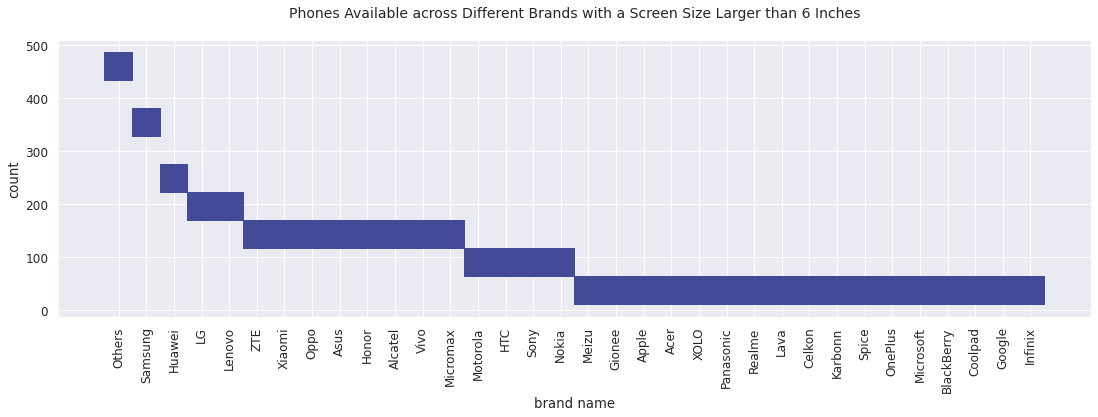

In [14]:
counts=data[data['screen_size']> 6]['brand_name'].value_counts().tolist()
bins=data[data['screen_size']> 6]['brand_name'].value_counts().index.tolist()

fig = plt.figure(figsize=(30, 6));

# Adds subplot on position 1
ax=fig.add_subplot(121)

#definig the color
color=sns. set_palette("dark")

#plotting
plt.title('Phones Available across Different Brands with a Screen Size Larger than 6 Inches\n', fontsize=14)
sns.histplot(y=counts, x=bins, palette=color);  # sorted plot

#adding labels
ax.set(xlabel='brand name', ylabel='count');
ax.tick_params(axis='x', rotation=90);

fig.tight_layout()

#### Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

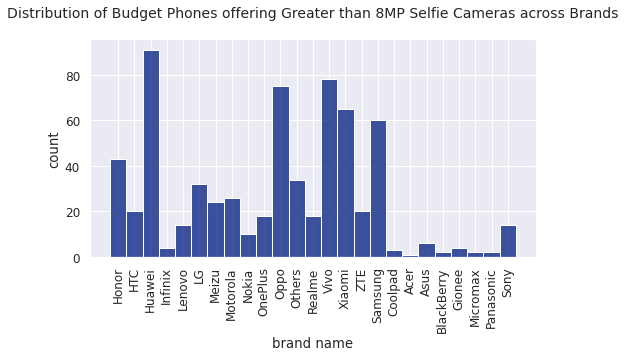

In [15]:
fig = plt.figure(figsize=(8, 4));

plt.title('Distribution of Budget Phones offering Greater than 8MP Selfie Cameras across Brands\n', fontsize=14)
ax=sns.histplot(x='brand_name', data=data[data['selfie_camera_mp']> 8] );

#adding labels
ax.set(xlabel='brand name', ylabel='count');
ax.tick_params(axis='x', rotation=90);

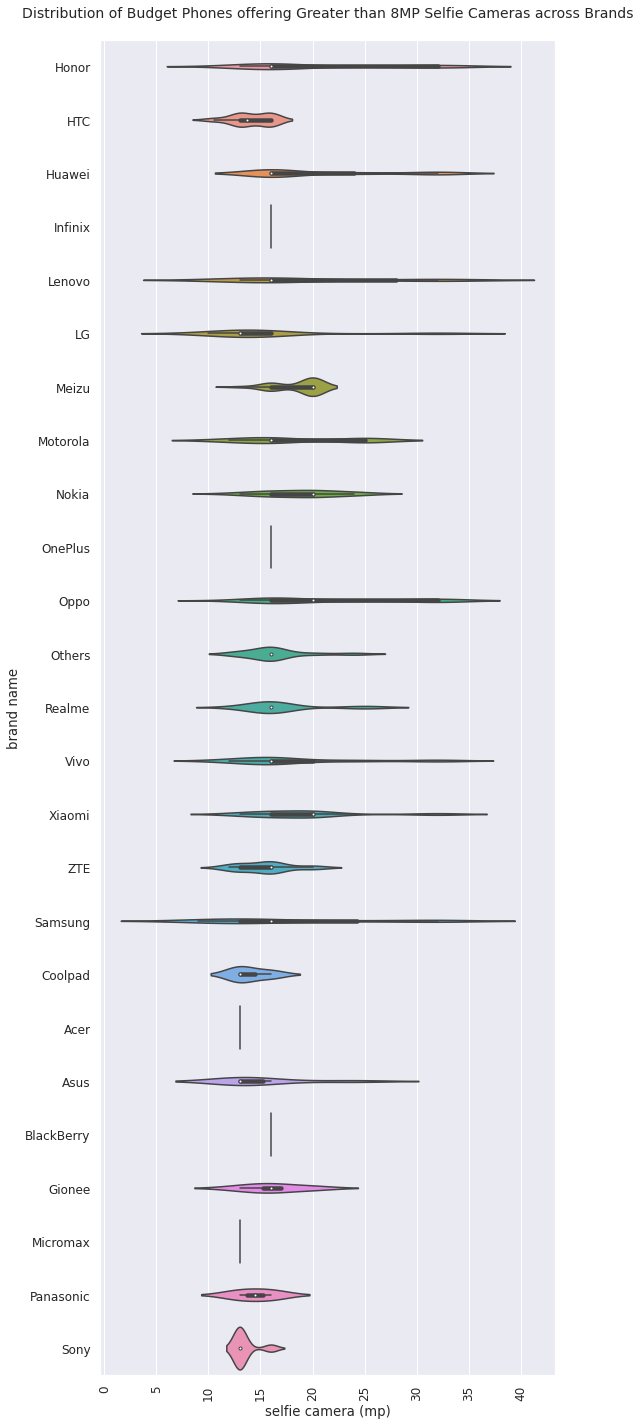

In [16]:
fig = plt.figure(figsize=(8, 20));

plt.title('Distribution of Budget Phones offering Greater than 8MP Selfie Cameras across Brands\n', fontsize=14)

ax=sns.violinplot(data=data[data['selfie_camera_mp']> 8], x="selfie_camera_mp", y="brand_name"  );

#adding labels
ax.tick_params(axis='x', rotation=90);
ax.set(xlabel='selfie camera (mp)' , ylabel='brand name');

fig.tight_layout()

* Samsung, LG, Lenovo, and honor respectively are the brands with most dispersed selfie camera resolution.
* On the contrary Infinix, OnePlus, Acer, BlackBerry, Micromax have the least dispersed selfie camera resolution.

#### Which attributes are highly correlated with the used phone price?

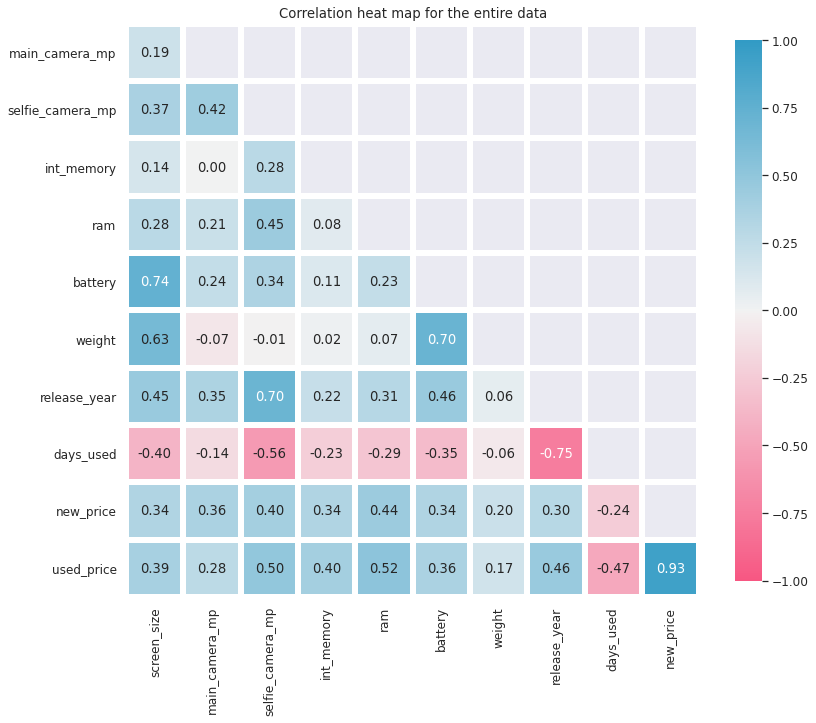

In [19]:
df_corr=data.corr()

fig = plt.figure(figsize=(12, 11));

#mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
b
#adjust the mask
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
ax=sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
               cbar_kws={"shrink": 0.8}, square=True);


plt.title('Correlation heat map for the entire data');

fig.tight_layout()

* `new price` is highly and positively correlated with target variable `used_price` which is good for model prediction.
* Moreover, correlations of `ram`, `selffie_camera_mp`, `days_used`, and `release_year` features with the target variable is noticable.
* `days_used` is highly and negatively correlated with `release_year` which is not good since on of the linear regression assumptions is the independence of predictor features.

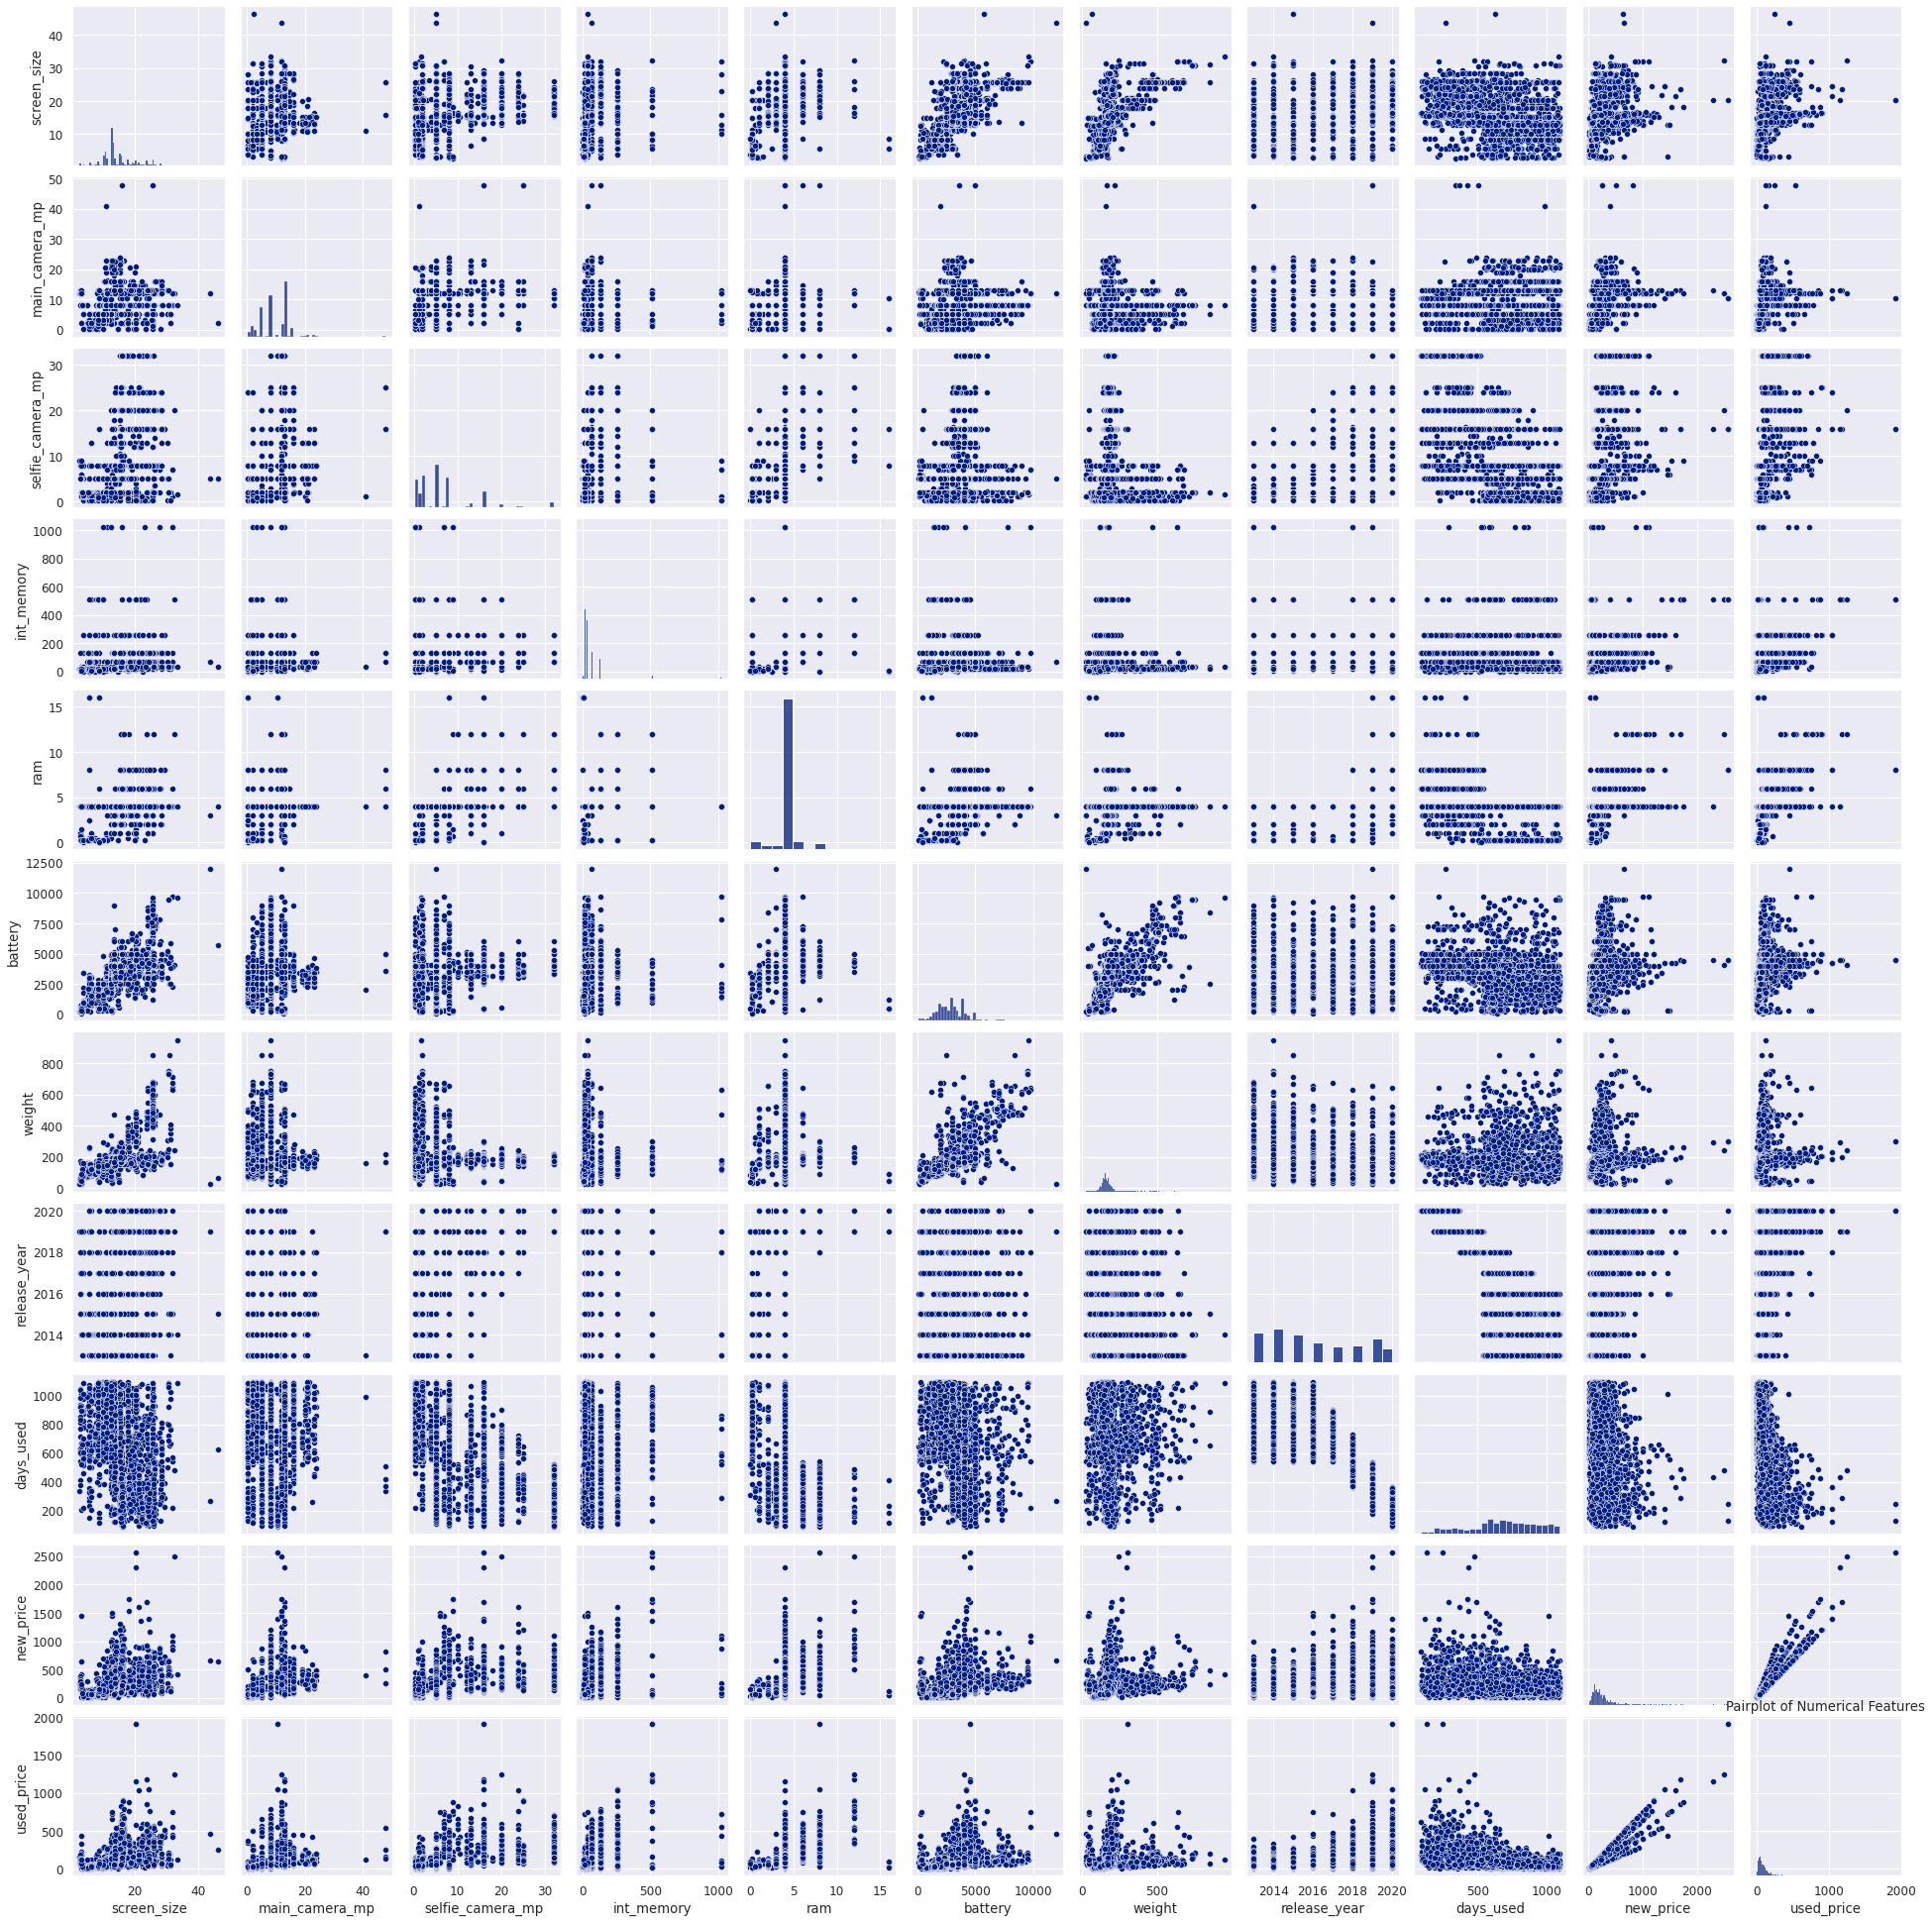

In [21]:
sns.pairplot(data);
plt.title('Pairplot of Numerical Features');

* As shown above, we can see that most of the histograms of numerical features are skewed. Moreover, it seems that we may be facing with outliers in them.
* We can see a linear relation between the new phone price and the target value (the used phone prices). This is positive in building the regression model.
* Among the predictor features, we can see positive correlation between weight and battery feature which is not good for the model.
* Weight feature also have a positive relation with the battery feature which again is not good for the model.

# <a name='link4'>  4. Data Preprocessing</a>

* Missing Value Treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### 4.1 Missing Value Treatment
List of variables that have missing values and the amount that is missing is listed below:

In [22]:
data.isnull().sum()[data.isnull().sum()>0]

main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
dtype: int64

There is no missing values in the target variable (used_price). However, six predictor variables have missing values and need treatments. All of these variables are quantitave variables with type 'float64'.

**Let us fix the missing values**.

For the six predictor variables, we will replace the missing values in each column with the column's median.

In [23]:
#Function to fill missing value with the median of associated values
medianFiller = lambda x: x.fillna(x.median())

#Creating a list of duantitative variables that have missing values
numeric_columns = data.isnull().sum()[data.isnull().sum()>0].index.tolist()

#Apply the medianFiller function on the numeric_columns in data set
data[numeric_columns] = data[numeric_columns].apply(medianFiller, axis=0)

In [24]:
# checking the number of missing values
data.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [ ]:
We can see that all the missing values have been treated.

4.2 Duplicate value check
Now, we want to figure out whether we have duplicate data and how to deal with them.